# Regression Tree and Forest
## Goals Met Prediction

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [149]:
df = pd.read_csv(r"C:\Users\Josh\Desktop\dabp_final-main\oversampled_health_outcomes.csv")
df = df.dropna()

In [151]:
matHealth = pd.read_csv(r"C:\Users\Josh\Desktop\dabp_final-main\PAHealth_MaternalChildHealth_20221127.csv").iloc[1:, 1:]
print(matHealth.shape)
matHealth.head()

(67, 49)


,County0,MICH-01_2011-2015,MICH-01_2012-2016,MICH-01_2013-2017,MICH-01_2014-2018,MICH-01_2015-2019,MICH-01_MetGoal,MICH-02_2011-2015,MICH-02_2012-2016,MICH-02_2013-2017,...,MICH-10_2013-2017,MICH-10_2014-2018,MICH-10_2015-2019,MICH-10_MetGoal,MICH-13_2011-2015,MICH-13_2012-2016,MICH-13_2013-2017,MICH-13_2014-2018,MICH-13_2015-2019,MICH-13_MetGoal
1,Adams,4.8,5.3,4.4,6.0,5.9,No,3.8,3.7,4.8,...,85.8,87.0,87.7,No,44.5,41.4,42.6,40.7,36.8,No
2,Allegheny,5.6,5.7,5.4,5.4,5.5,Yes,6.1,6.1,6.1,...,89.0,89.8,90.8,No,31.7,29.4,32.5,32.7,24.7,No
3,Armstrong,4.9,5.6,6.4,6.9,7.9,No,4.6,5.7,5.8,...,76.9,78.1,79.6,No,36.6,34.2,35.6,32.0,30.6,No
4,Beaver,7.6,7.3,6.9,7.3,6.4,No,7.2,6.8,6.6,...,80.9,82.5,83.5,No,41.2,41.8,37.4,39.2,33.8,No
5,Bedford,7.1,7.5,6.7,5.9,6.0,No,6.8,5.5,6.4,...,80.0,81.5,83.3,No,47.2,43.3,45.4,39.3,42.9,No


In [152]:
goals_met = matHealth[[m for m in matHealth.columns if 'MetGoal' in m]].replace({'No':0, 'Yes':1, 'DSU': None})
goals_met['Total_MetGoals'] = goals_met.sum(axis=1)
goals_met.head()

,MICH-01_MetGoal,MICH-02_MetGoal,MICH-03_MetGoal,MICH-06_MetGoal,MICH-07_MetGoal,MICH-08_MetGoal,MICH-10_MetGoal,MICH-13_MetGoal,Total_MetGoals
1,0.0,1.0,1.0,0.0,1,1,0,0,4.0
2,1.0,0.0,0.0,0.0,0,1,0,0,2.0
3,0.0,0.0,0.0,0.0,0,1,0,0,1.0
4,0.0,0.0,0.0,0.0,1,1,0,0,2.0
5,0.0,0.0,0.0,1.0,1,0,0,0,2.0


In [154]:
cols = ['County0']
cols.extend([m for m in matHealth.columns if '2019' in m])
cols


outcomes = matHealth[cols]
outcomes['Total_MetGoals'] = goals_met['Total_MetGoals']
outcomes['MetGoal_Reached'] = (outcomes['Total_MetGoals'] > 0).astype(int)
outcomes.rename(columns={'County0': 'County'}, inplace=True)
outcomes

,County,MICH-01_2015-2019,MICH-02_2015-2019,MICH-03_2015-2019,MICH-06_2015-2019,MICH-07_2015-2019,MICH-08_2015-2019,MICH-10_2015-2019,MICH-13_2015-2019,Total_MetGoals,MetGoal_Reached
1,Adams,5.9,4.7,15.4,23.8,9.4,83.4,87.7,36.8,4.0,1
2,Allegheny,5.5,6.0,27.4,28.5,9.9,87.2,90.8,24.7,2.0,1
3,Armstrong,7.9,6.3,31.8,28.9,9.7,82.4,79.6,30.6,1.0,1
4,Beaver,6.4,7.2,21.8,32.8,8.8,82.3,83.5,33.8,2.0,1
5,Bedford,6.0,5.1,29.7,22.3,8.5,78.8,83.3,42.9,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
63,Washington,6.2,5.0,26.1,28.6,9.1,77.4,82.8,38.0,2.0,1
64,Wayne,DSU,DSU,DSU,24.3,8.8,85.9,83.4,40.7,2.0,1
65,Westmoreland,5.5,4.8,26.4,27.3,9.1,88.6,84.5,32.7,4.0,1
66,Wyoming,12.3,DSU,DSU,23.4,9.7,83.8,76.9,39.2,2.0,1


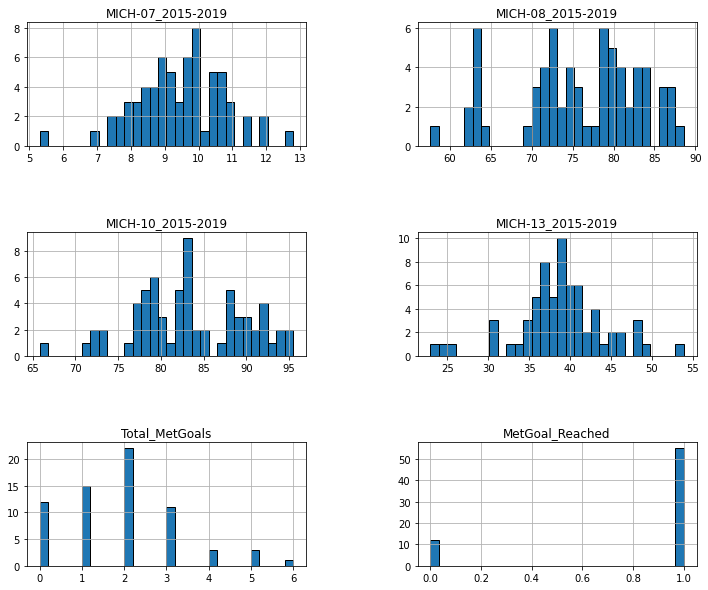

In [155]:
outcomes.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [158]:
features_of_interest = ["population", "perc_obese", "perc_lowbirth", "pop_change_2010"]
df[features_of_interest].describe()

,population,perc_obese,perc_lowbirth,pop_change_2010
count,2.040000e+02,204.000000,204.000000,204.000000
mean,2.799115e+05,34.112745,8.210294,-1.411765
std,4.134070e+05,3.652657,1.227694,3.528946
min,1.453000e+04,22.000000,5.500000,-9.400000
25%,6.032300e+04,32.000000,7.400000,-3.900000
50%,1.550270e+05,34.000000,8.400000,-1.600000
75%,2.782990e+05,36.000000,8.900000,0.300000
max,1.584064e+06,41.000000,11.000000,5.700000


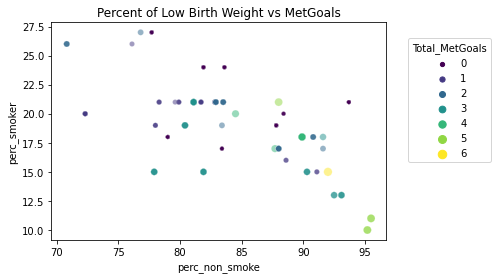

In [147]:
import seaborn as sns

sns.scatterplot(data=df, x="perc_non_smoke", y="perc_smoker",
                size="Total_MetGoals", hue="Total_MetGoals",
                palette="viridis", alpha=0.5)
plt.legend(title="Total_MetGoals", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Percent of Low Birth Weight vs MetGoals")

In [159]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(df.shape[0]), size=60,
                     replace=False)

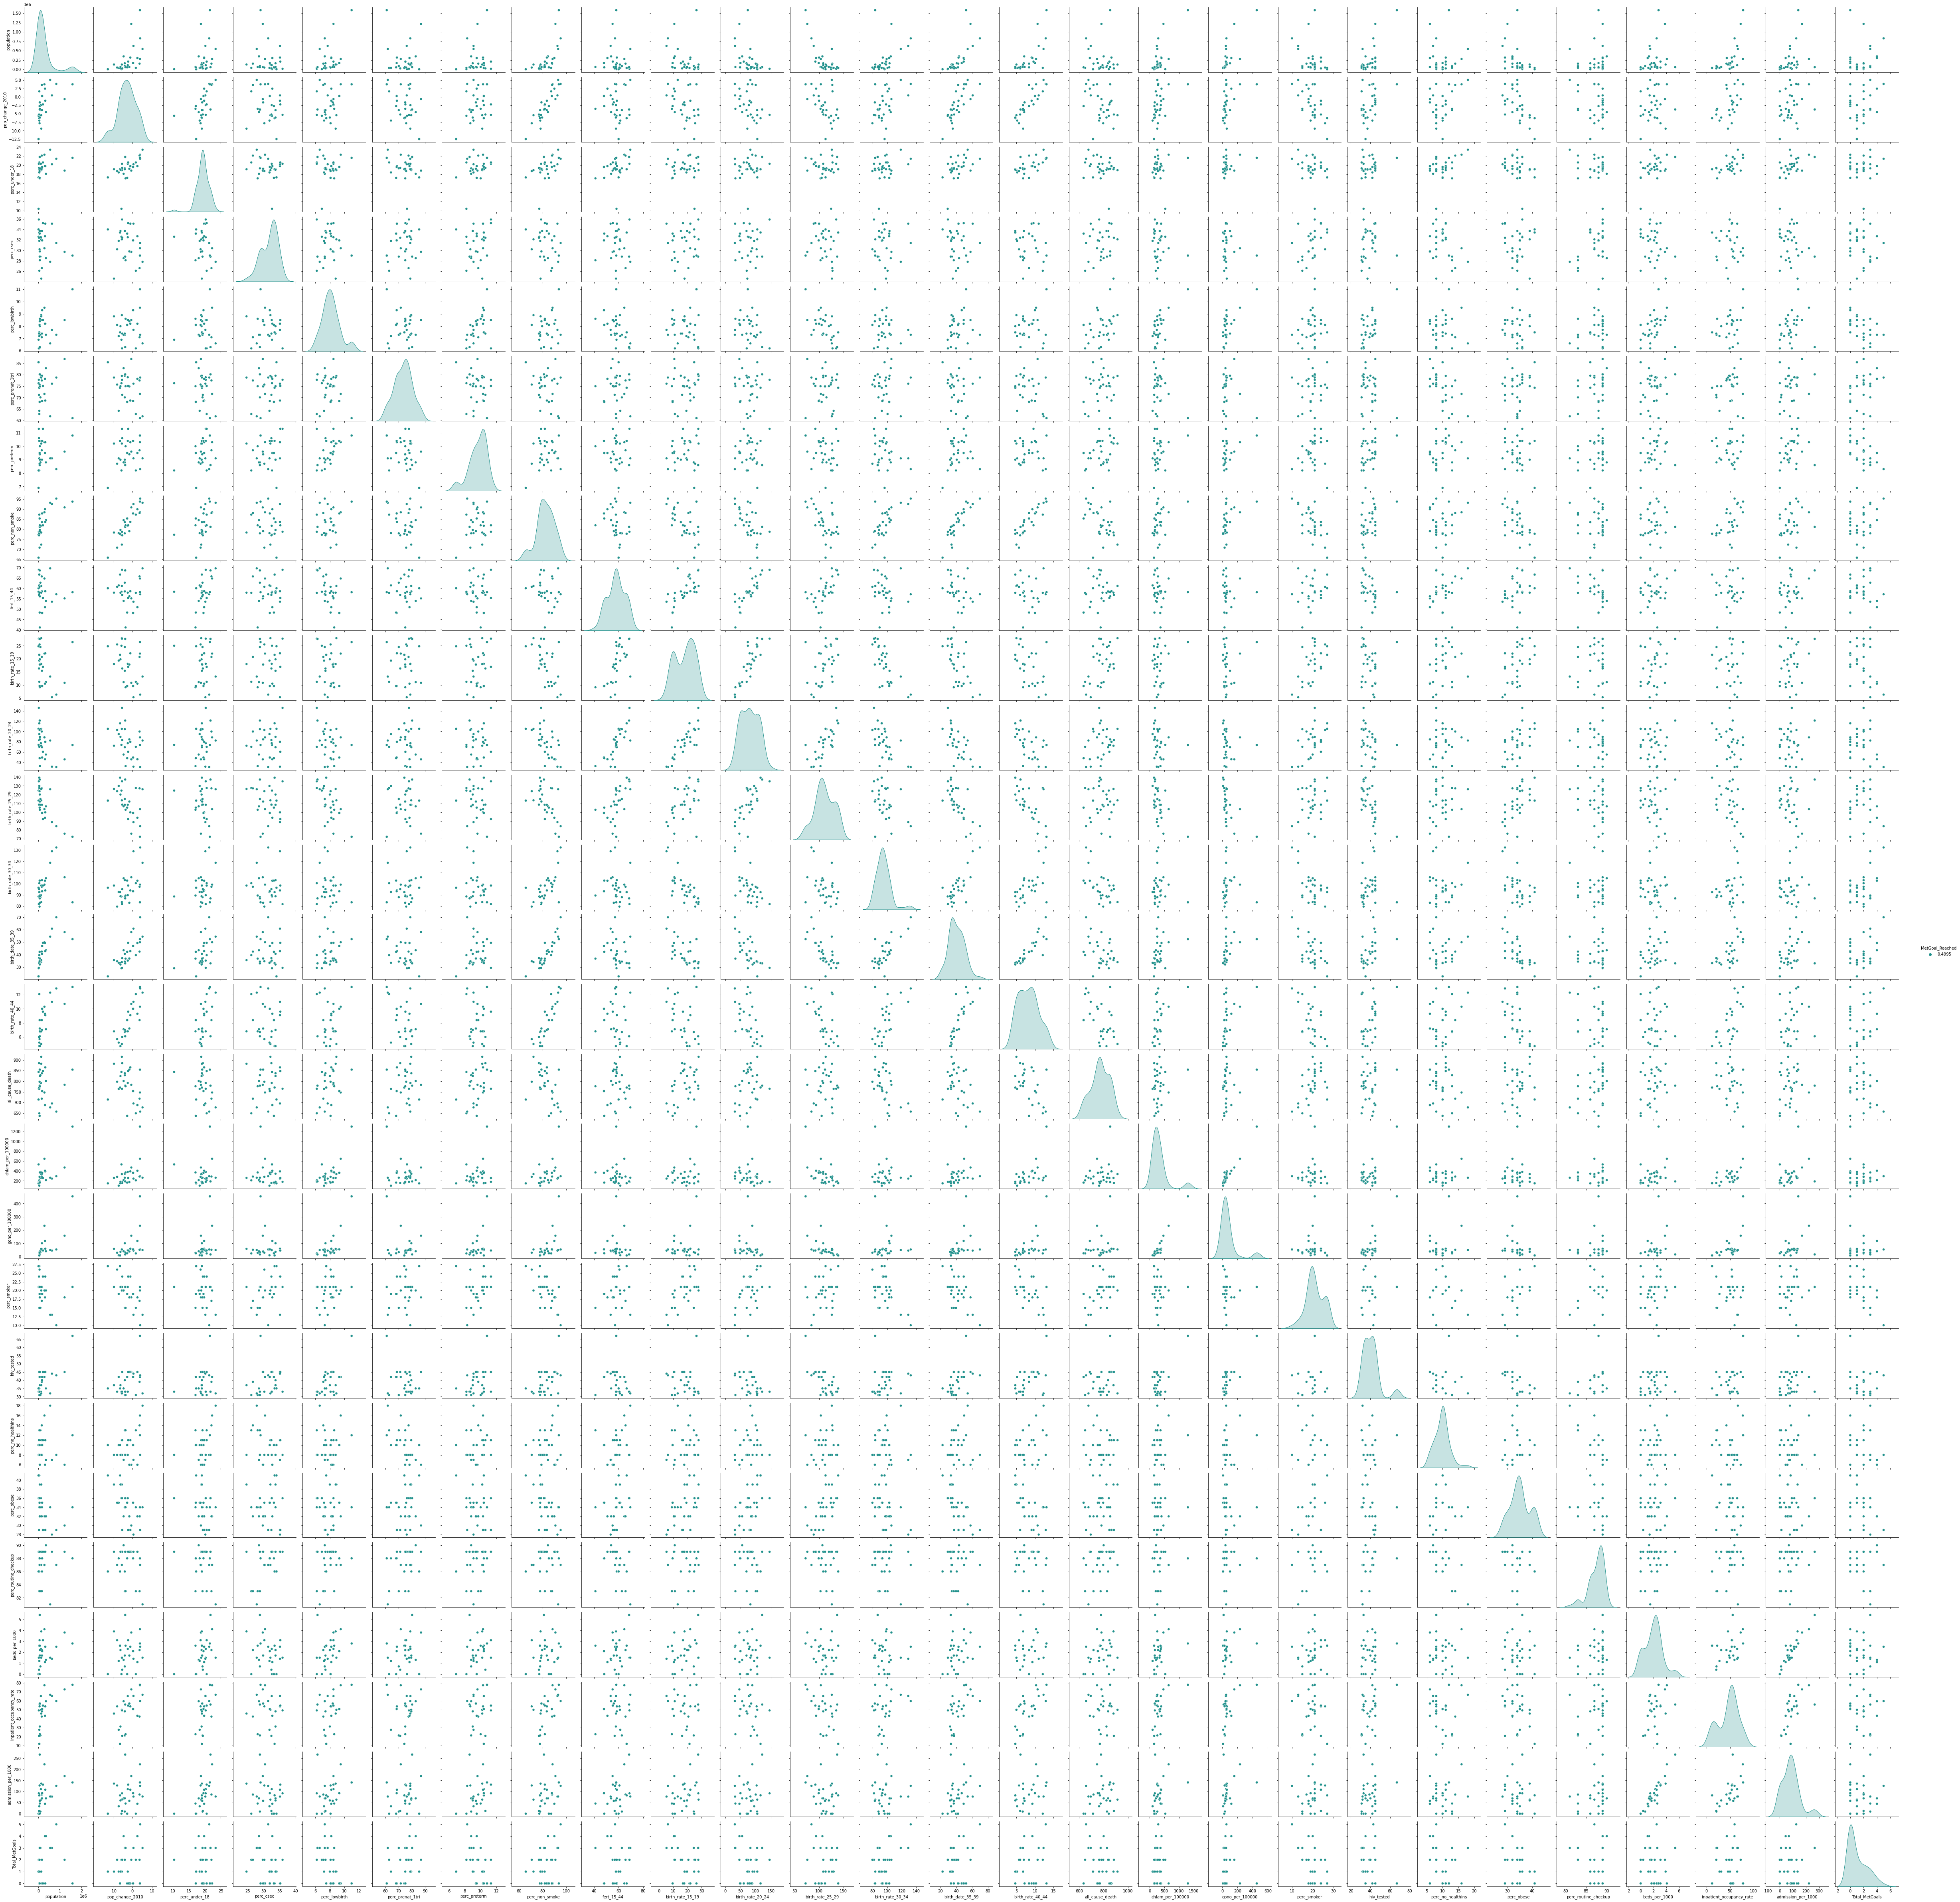

In [132]:
_ = sns.pairplot(data=subset, hue="MetGoal_Reached", palette="viridis")

### 2. Linear Regression

In [160]:
list(df.columns)

data = ['population',
'pop_change_2010',
 'perc_under_18',
 'perc_csec',
 'perc_lowbirth',
 'perc_prenat_1tri',
 'perc_preterm',
 'perc_non_smoke',
 'fert_15_44',
 'birth_rate_15_19',
 'birth_rate_20_24',
 'birth_rate_25_29',
 'birth_rate_30_34',
 'birth_date_35_39',
 'birth_rate_40_44',
 'all_cause_death',
 'chlam_per_100000',
 'gono_per_100000',
 'perc_smoker',
 'hiv_tested',
 'perc_no_healthins',
 'perc_obese',
 'perc_routine_checkup',
 'beds_per_1000',
 'inpatient_occupancy_rate',
 'admission_per_1000']
target = ['Total_MetGoals']

In [161]:
## from sklearn.model_selection import train_test_split
X = df[data]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [162]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
l1 = linreg.score(X_train, y_train)
l2 = linreg.score(X_test, y_test)
print("R² of Linear Regression on training set: {:.3f}".format(l1))
print("R² of Linear Regression on test set: {:.3f}".format(l2))

R² of Linear Regression on training set: 0.908
R² of Linear Regression on test set: 0.690


### 3. Regression Tree

In [171]:
features = df[data]
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
t1 = tree.score(X_train, y_train)
t2 = tree.score(X_test, y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(t1))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t2))

R² of Decision Tree Regressor on training set: 1.000
R² of Decision Tree Regressor on test set: 0.852


In [172]:
tree1 = DecisionTreeRegressor(max_depth=6, random_state=0)
tree1.fit(X_train, y_train)
t3 = tree1.score(X_train, y_train)
t4 = tree1.score(X_test, y_test)
print("R² of Decision Tree Regressor on training set: {:.3f}".format(t3))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t4))

R² of Decision Tree Regressor on training set: 1.000
R² of Decision Tree Regressor on test set: 0.852


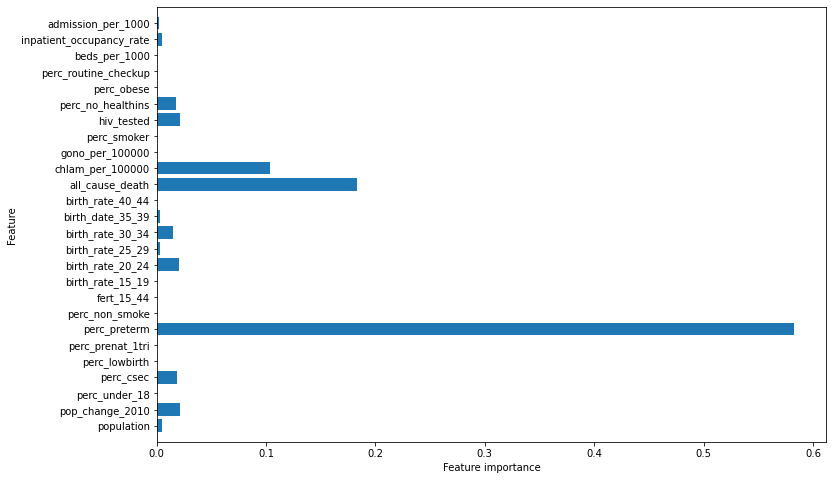

In [183]:
def plot_feature_importances(model):
 plt.figure(figsize=(12,8))
 n_features = 26
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), features)
 plt.xlabel('Feature importance')
 plt.ylabel('Feature')
 plt.ylim(-1, n_features)
plot_feature_importances(tree1)
#plt.savefig('feature_importance')

We can also look at the performance of the model as we change the model complexity.

In [174]:
depths = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
train_R2 = np.zeros(len(depths))
test_R2 = np.zeros(len(depths))

trees=[]

for i in range(len(depths)):
    depth = depths[i]
    tree = DecisionTreeRegressor(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    train_R2[i] = tree.score(X_train, y_train)
    test_R2[i] = tree.score(X_test, y_test)
    trees.append(tree)
    print('Max depth of tree ', depth)
    print('R² of Tree Regressor on training set: {:.3f}'.format(train_R2[i]))
    print('R² of Tree Regressor on test set: {:.3f}'.format(test_R2[i]))


Max depth of tree  1
R² of Tree Regressor on training set: 0.580
R² of Tree Regressor on test set: 0.541
Max depth of tree  2
R² of Tree Regressor on training set: 0.784
R² of Tree Regressor on test set: 0.586
Max depth of tree  3
R² of Tree Regressor on training set: 0.911
R² of Tree Regressor on test set: 0.838
Max depth of tree  4
R² of Tree Regressor on training set: 0.966
R² of Tree Regressor on test set: 0.807
Max depth of tree  5
R² of Tree Regressor on training set: 0.995
R² of Tree Regressor on test set: 0.775
Max depth of tree  6
R² of Tree Regressor on training set: 1.000
R² of Tree Regressor on test set: 0.852
Max depth of tree  7
R² of Tree Regressor on training set: 1.000
R² of Tree Regressor on test set: 0.852
Max depth of tree  8
R² of Tree Regressor on training set: 1.000
R² of Tree Regressor on test set: 0.852
Max depth of tree  9
R² of Tree Regressor on training set: 1.000
R² of Tree Regressor on test set: 0.852
Max depth of tree  10
R² of Tree Regressor on training 

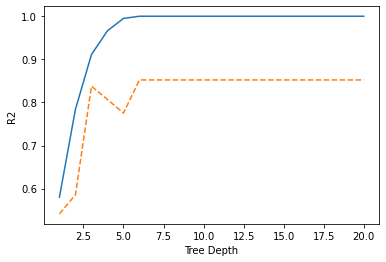

In [175]:
fig, ax = plt.subplots()
ax.plot(depths, train_R2,'-')
ax.plot(depths, test_R2,'--')
plt.xlabel('Tree Depth')
plt.ylabel('R2')
plt.show()

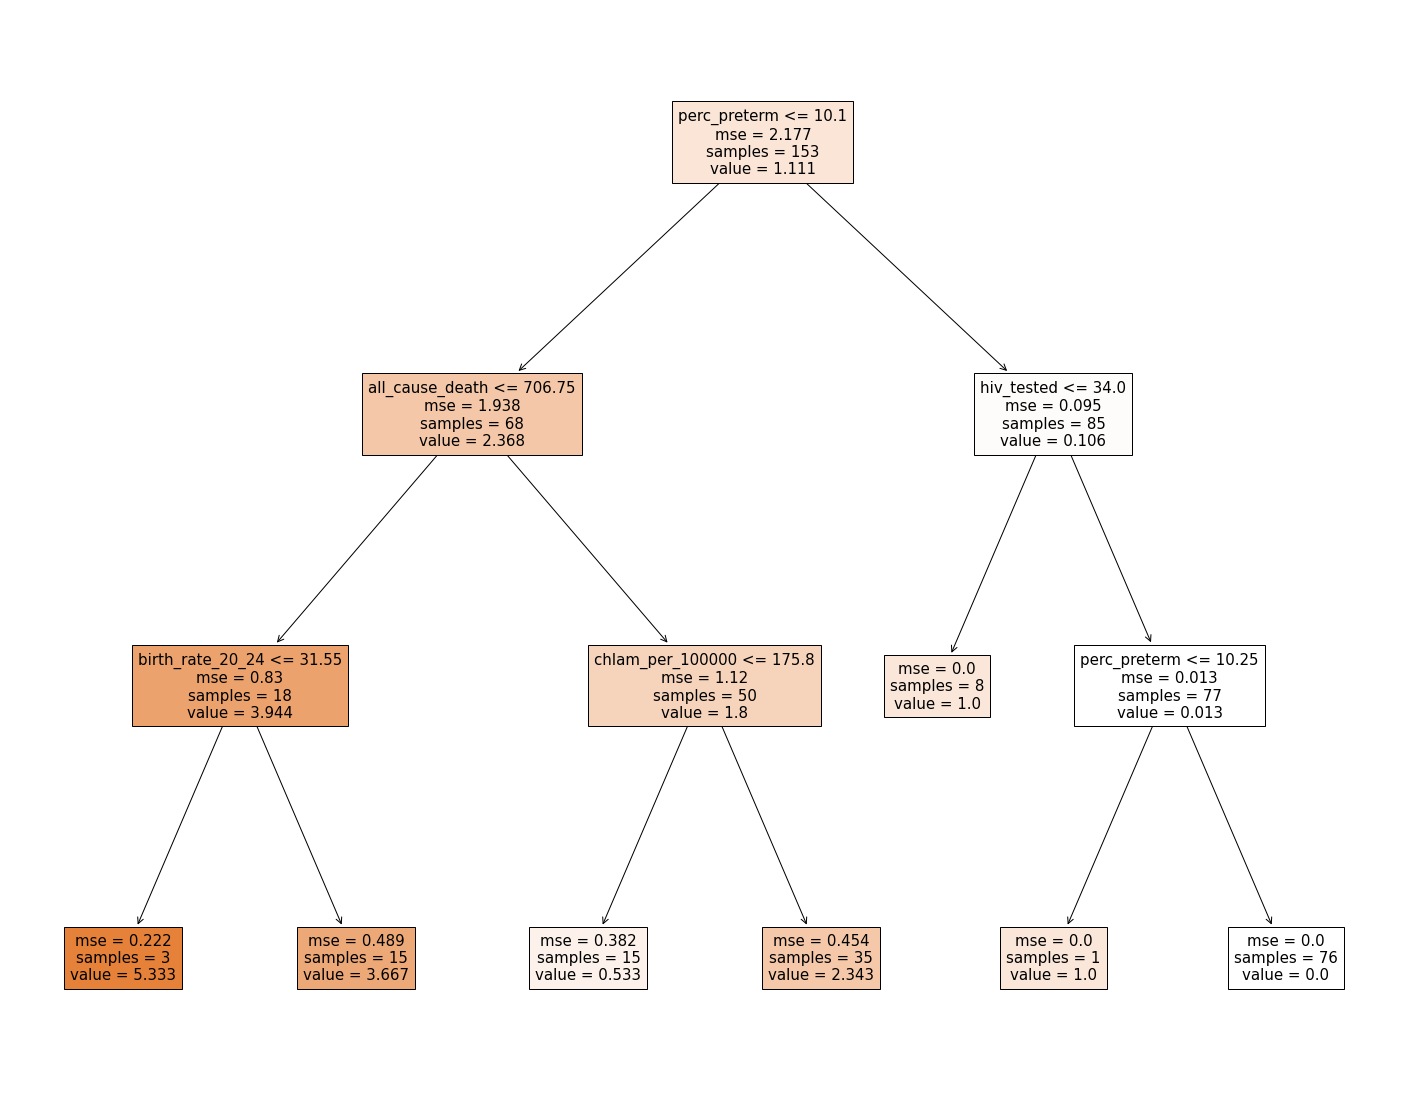

In [177]:
from sklearn import tree

tree_fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(trees[2], 
                   feature_names=data,  
                   filled=True)

### 4. Forest

In [178]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

R² of Random Forest Regressor on training set: 0.992
R² of Random Forest Regressor on test set: 0.875


In [184]:
forest_sizes = np.array([1,2,5,10,20,50,100,200])
train_R2 = np.zeros(len(forest_sizes))
test_R2 = np.zeros(len(forest_sizes))
                    
for i in range(len(forest_sizes)):
    size = forest_sizes[i]
    rf = RandomForestRegressor(n_estimators=size, random_state=0)
    rf.fit(X_train, y_train)
    r1 = rf.score(X_train, y_train)
    r2 = rf.score(X_test, y_test)
    train_R2[i] = r1
    test_R2[i] = r2
    print('Number of trees ', size)
    print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
    print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
    print(' ')

Number of trees  1
R² of Random Forest Regressor on training set: 0.961
R² of Random Forest Regressor on test set: 0.852
 
Number of trees  2
R² of Random Forest Regressor on training set: 0.975
R² of Random Forest Regressor on test set: 0.876
 
Number of trees  5
R² of Random Forest Regressor on training set: 0.987
R² of Random Forest Regressor on test set: 0.929
 
Number of trees  10
R² of Random Forest Regressor on training set: 0.988
R² of Random Forest Regressor on test set: 0.878
 
Number of trees  20
R² of Random Forest Regressor on training set: 0.990
R² of Random Forest Regressor on test set: 0.862
 
Number of trees  50
R² of Random Forest Regressor on training set: 0.991
R² of Random Forest Regressor on test set: 0.872
 
Number of trees  100
R² of Random Forest Regressor on training set: 0.992
R² of Random Forest Regressor on test set: 0.875
 
Number of trees  200
R² of Random Forest Regressor on training set: 0.993
R² of Random Forest Regressor on test set: 0.875
 


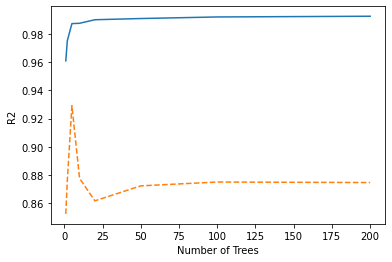

In [185]:
fig, ax = plt.subplots()
ax.plot(forest_sizes, train_R2,'-')
ax.plot(forest_sizes, test_R2,'--')
plt.xlabel('Number of Trees')
plt.ylabel('R2')
plt.show()